# Lab: Week #13 | Semester 1 Review and State Vectors
---

### **Description**:  
In this week's lab, we will warm up with a review of the coding skills we developed last semester and then dive into viewing quantum states as vectors.

**Part 0:** Import Libraries<br>
**Part 1:** Warm Up <br>
**Part 2:** State Vectors<br>

<br>

### **Cheat Sheets**:  

[Updated Qiskit Cheat Sheet](https://docs.google.com/document/d/1GArKBUksi4pMgcEBc4OpvWp2KREPpnQvq0AgyijJnkI/edit?usp=share_link)

[Loops and Conditionals Cheat Sheet](https://docs.google.com/document/d/1WKvv22SC7pA0TCqCJnxgZOf2tHjvTotaHYEtOx2FNkI/edit?usp=share_link)


---

## **Part 0: Import Libraries**
---

Run the cell below before doing anything else. This will import all of the libraries that we will use today.

In [1]:
!pip install qiskit

In [2]:
import warnings 
warnings.filterwarnings("ignore")

#import numpy as np


# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

from qiskit.quantum_info import Statevector

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

## **Part 1: Warm-Up**
---

### **Exercise #1**

**Together**, let's create a 3 qubit/3 classical bit quantum circuit just as we did last semester. Then, we will modify it several times in order to create more streamlined code.

**1.** Create a 3 qubit/3 classical bit quantum circuit where you apply an X gate to all 3 qubits and then measure them all. Then draw this circuit.


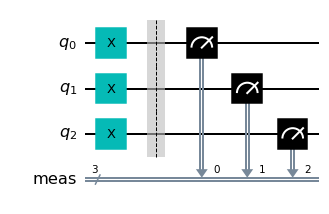

In [5]:
qc = QuantumCircuit(3)

for i in range (3):
    qc.x(i)


qc.measure_all()

qc.draw()

**2.** Now, copy your solution from above and modify it so that all 3 X gates are applied on one line using lists.

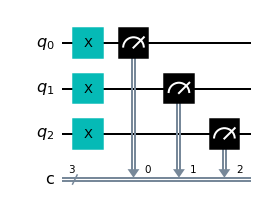

In [6]:
qc = QuantumCircuit(3, 3)

qc.x([0,1,2])

qc.measure([0, 1, 2], [0, 1, 2])

qc.draw()

**3.** Lastly, copy your code from directly above and modify it so that instead of `qc.measure([qubits...], [classical bits...])`, you use the function `qc.measure_all()`.

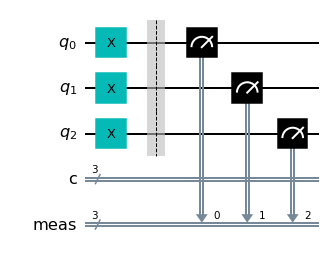

In [7]:
qc = QuantumCircuit(3, 3)

qc.x([0, 1, 2])

qc.measure_all()

qc.draw()

**4.** Notice that `qc.measure_all()` creates its own classical bits to store the measurement results in. So as a last step, let's copy the code over and change it so it is just a 3 qubit/0 classical bit circuit initially. This way we do not risk wasting any resources or cluttering up the circuit drawings.

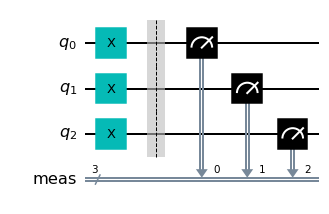

In [8]:
qc = QuantumCircuit(3)

qc.x([0, 1, 2])

qc.measure_all()

qc.draw()

### **Exercise #2**

**Independently**, create a 10 qubit/0 classical bit circuit in which all qubits are put into the $| + \rangle$ state and then measured.

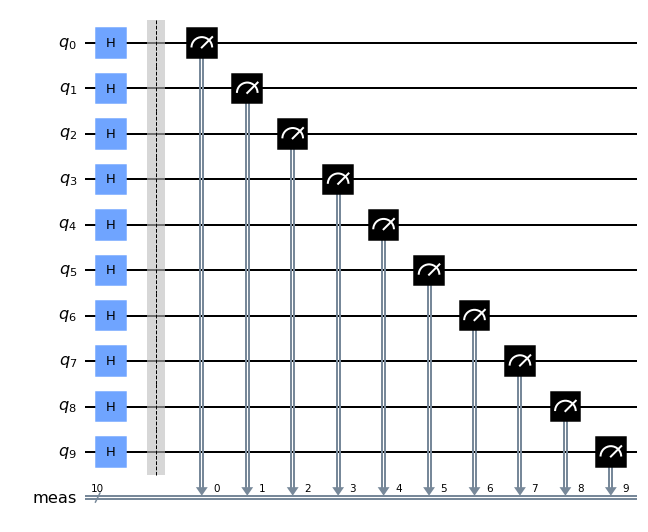

In [10]:
circuit = QuantumCircuit(10,0)
for i in range(10):
    circuit.h(i)
circuit.measure_all()
circuit.draw()

### **Exercise #3**

**Independently**, create a 5 qubit/0 classical bit circuit in which all qubits are put into the $|- \rangle$ state and then measured.

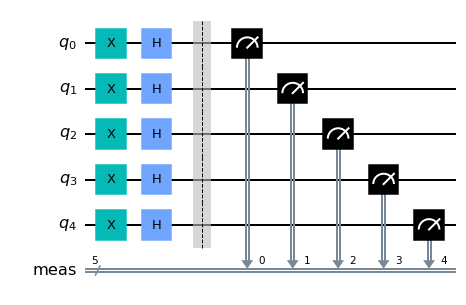

In [15]:
qc = QuantumCircuit(5,0)

for i in range(5):
    qc.x(i);qc.h(i)
    
qc.measure_all()
qc.draw()

**Run this code to simulate your circuit.**

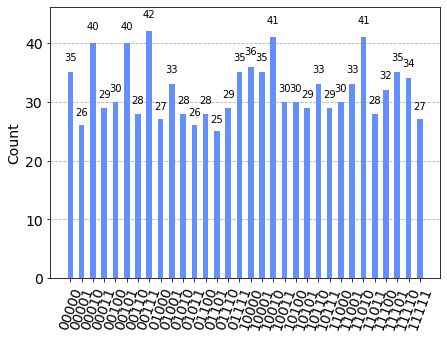

In [18]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)


results = job.result()
plot_histogram(results.get_counts(qc))

### **Exercise 4**
**Independently**, create a 5 qubit/0 classical bit circuit in which qubits 0 - 2 are put in the $| + \rangle$ state and qubits 3 - 4 are put into the $| - \rangle$ state and then measured. Run the provided code below to simulate the circuit and verify that you have coded this correctly.


**NOTE: This circuit should produce equal likelihoods of all possible states just like the previous exercise.**

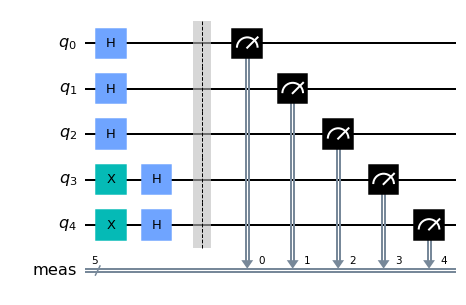

In [20]:
circuit = QuantumCircuit(5,0)

for i in range(3):
    circuit.h(i)
    
for i in range(3,5):
    circuit.x(i);circuit.h(i)

circuit.measure_all()
circuit.draw()

**Run this code to simulate your circuit.**

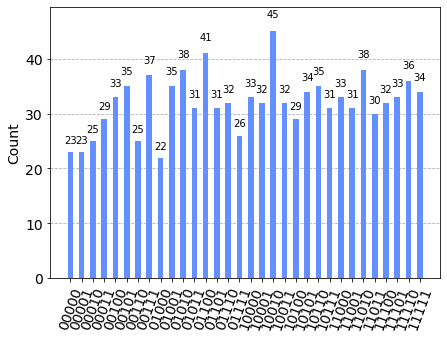

In [22]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)

results = job.result()
plot_histogram(results.get_counts(qc))

### **Exercise 5**

**Independently**, create a 10 qubit/0 classical bit circuit in which all 10 qubits are entangled so that they always agree with each other and then measure. Run the provided code below to simulate this circuit and verify that you have coded this correctly.

In other words, the circuit should produce an equal superposition of the states $| 0000000000 \rangle$ and $| 1111111111 \rangle$.

<br>

**NOTE: There are multiple acceptable solutions to this problem. All of them will fundamentally need to somehow create a state where you have multiple states at the same time and the state of each qubit is deeply related to or *controlled* by the state of another qubit.**

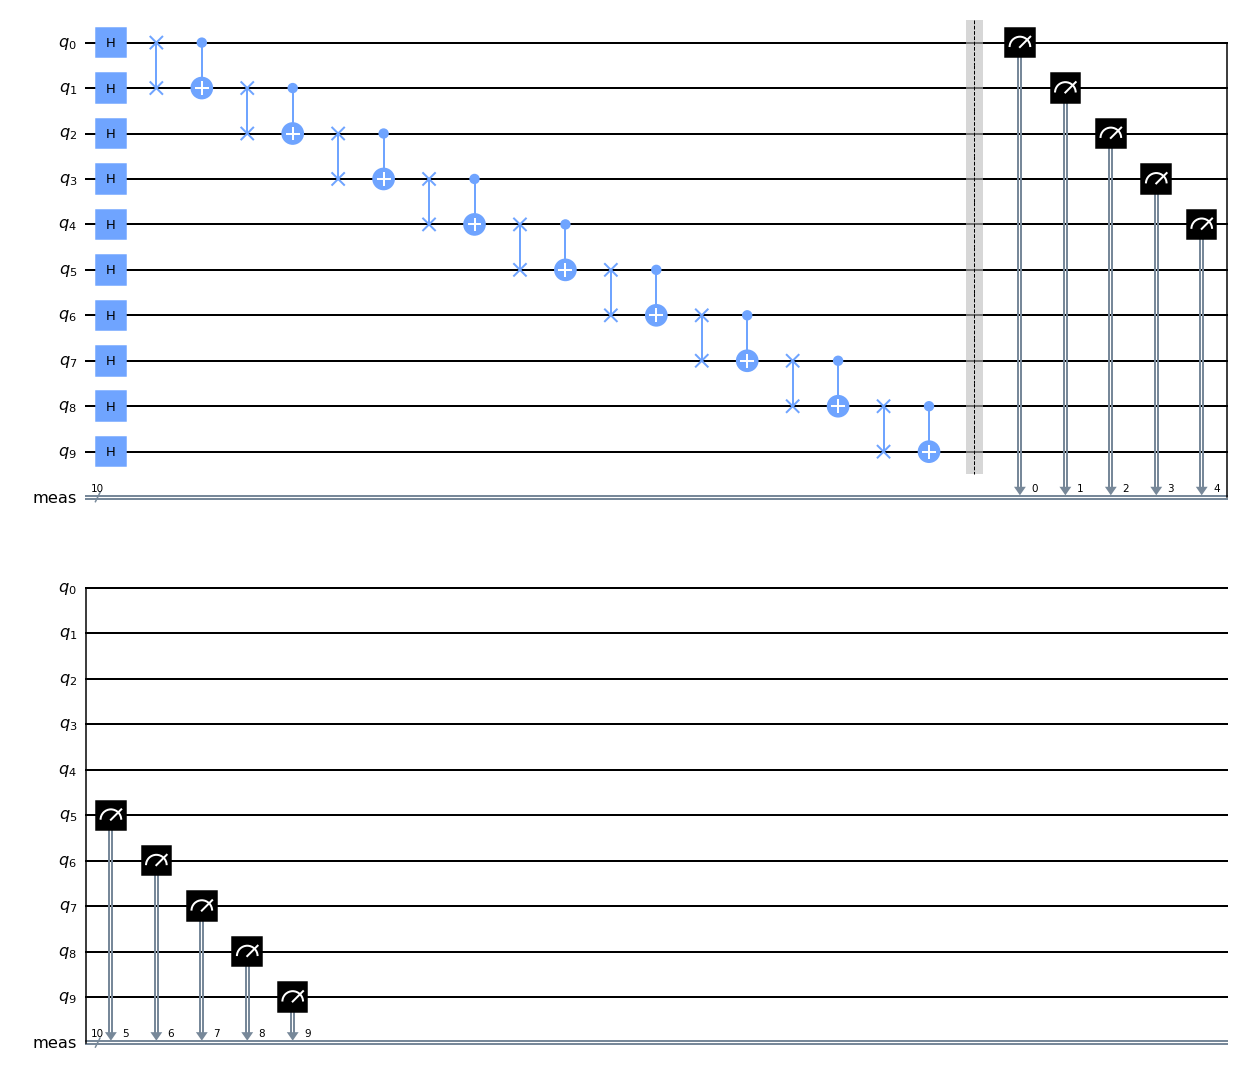

In [25]:
qc = QuantumCircuit(10,0)

for i in range(10):
    qc.h(i)
for i in range(9):
    qc.swap(i,i+1)
    qc.cx(i,i+1)
qc.measure_all()
qc.draw()

**Run this code to simulate your circuit.**

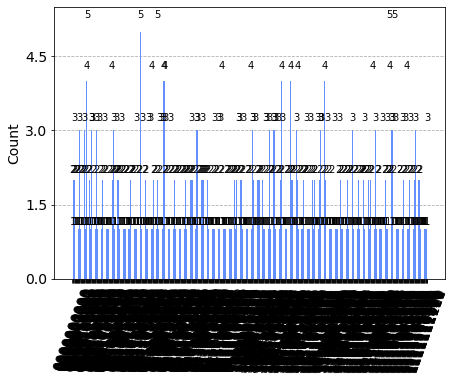

In [26]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)

results = job.result()
plot_histogram(results.get_counts(qc))

## **Part 2: State Vectors**
---

**NOTE: From now on, you do not need to add classical bits to any of your quantum circuits unless otherwise specified.**

### **Exercise 1**

**Together**, let's create a 1 qubit circuit where we get the state vector of the qubit right after initializing the circuit. Then, we will explore how we can examine and use this state vector.

**1.** Complete the code below to create a 1 qubit circuit and store the state vector of the qubit in the variable `state0`.

In [27]:
qc = QuantumCircuit(1)

state0 = Statevector.from_instruction(qc)

**2.** Run the code below to see the vector representation of this state. 

In [28]:
state0.draw('text')

[1.+0.j,0.+0.j]

**3.** Run the code below to get a highly formatted ket representation of this state. 

<br>

**NOTE: This uses LaTeX to create this formatting, which is an extremely popular *markup language* in STEM and other fields. Many papers and other documents are written using LaTeX. Another example of a markup language you may have heard of is HTML, which is primarily used for formatting web pages.**

In [29]:
state0.draw('latex')

<IPython.core.display.Latex object>

**4.** Modify the code below to see the Bloch sphere representation of this state.

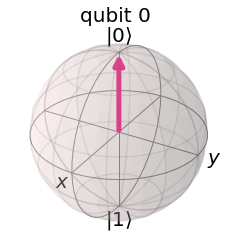

In [30]:
state0.draw('bloch')

**5.** Lastly, run the code below to simulate measuring this state.

In [31]:
state0.measure()

('0',
 Statevector([1.+0.j, 0.+0.j],
             dims=(2,)))

### **Exercise 2**

Complete the code below to print out the state vectors throughout the process of preparing.

In [35]:
qc = QuantumCircuit(1)
state0 = Statevector.from_instruction(qc)
print("Initial State: " + str(state0.draw('text'))

qx.x(0)
state1 = Statevector.from_instruction(qc)
print("State after X gate: " + str(state1.draw('text'))

qc.h(0)
state2 = Statevector.from_instruction(qc)
print("State after H gate: " + str(state2.draw('text'))

Traceback (most recent call last):
  File /opt/conda/lib/python3.8/site-packages/IPython/core/compilerop.py:105 in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  Input In [35]
    qx.x(0)
    ^
SyntaxError: invalid syntax

Use %tb to get the full traceback.



---
© 2023 The Coding School, All rights reserved